Sample of EDA on the [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker)

In [1]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('OxCGRT_latest.csv')



/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
data_usa = data[data['CountryCode']=='USA']

#drop nationwide data
data_usa = data_usa.dropna(subset=['RegionName'])

#convert int date to datetime
data_usa['Datetime'] = pd.to_datetime(data_usa['Date'], format='%Y%m%d')

In [3]:
data_usa.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,...,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,Datetime
162792,United States,USA,Alaska,US_AK,STATE_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01
162793,United States,USA,Alaska,US_AK,STATE_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-02
162794,United States,USA,Alaska,US_AK,STATE_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-03
162795,United States,USA,Alaska,US_AK,STATE_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-04
162796,United States,USA,Alaska,US_AK,STATE_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-05


In [4]:
data_usa.columns

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'H8_Protection of elderly people', 'H8_Flag', 'M1_Wildcard',
       'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'Stringenc

In [5]:
data_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32946 entries, 162792 to 195737
Data columns (total 52 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   CountryName                            32946 non-null  object        
 1   CountryCode                            32946 non-null  object        
 2   RegionName                             32946 non-null  object        
 3   RegionCode                             32946 non-null  object        
 4   Jurisdiction                           32946 non-null  object        
 5   Date                                   32946 non-null  int64         
 6   C1_School closing                      32529 non-null  float64       
 7   C1_Flag                                27250 non-null  float64       
 8   C2_Workplace closing                   32491 non-null  float64       
 9   C2_Flag                                24548 non-null  

## See vaccination policy by region

In [9]:
from states_dictionary import*

us_state_to_code = us_state_to_code()
states_to_regionChr = states_to_regionChr()
regionchr_to_regioncode = regionchr_to_regioncode()

regioncodes = []
for region in data_usa['RegionName'].values:
    abbrev = us_state_to_code[region]
    regionChr = states_to_regionChr[abbrev]
    regioncode = regionchr_to_regioncode[regionChr]
    regioncodes.append(regioncode)
    
data_usa['RegionCat'] = regioncodes

In [10]:
#only look at data between 2020-12-1 and 2021-6-1 (when policy change is happening)

data_usa_time = data_usa[(data_usa['Datetime']<pd.Timestamp(2021,6,1)) & (data_usa['Datetime']>pd.Timestamp(2020,12,1))]

In [11]:
states = data_usa_time['RegionName'].unique()
print(states)

['Alaska' 'Alabama' 'Arkansas' 'Arizona' 'California' 'Colorado'
 'Connecticut' 'Washington DC' 'Delaware' 'Florida' 'Georgia' 'Hawaii'
 'Iowa' 'Idaho' 'Illinois' 'Indiana' 'Kansas' 'Kentucky' 'Louisiana'
 'Massachusetts' 'Maryland' 'Maine' 'Michigan' 'Minnesota' 'Missouri'
 'Mississippi' 'Montana' 'North Carolina' 'North Dakota' 'Nebraska'
 'New Hampshire' 'New Jersey' 'New Mexico' 'Nevada' 'New York' 'Ohio'
 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Virginia' 'Vermont'
 'Washington' 'Wisconsin' 'West Virginia' 'Wyoming']


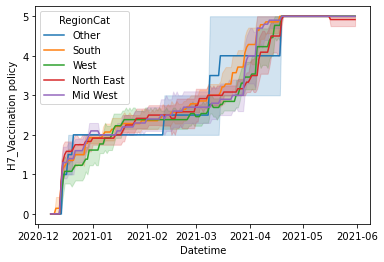

In [13]:
import matplotlib.pyplot as plt

sns.lineplot(data=data_usa_time, x='Datetime', y='H7_Vaccination policy', hue="RegionCat")
plt.show()

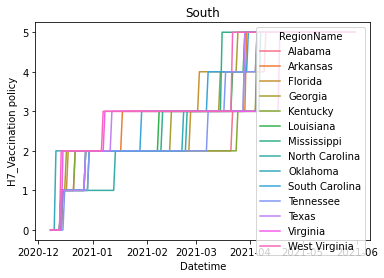

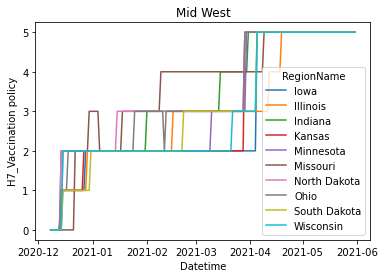

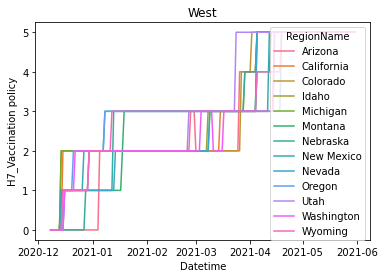

In [14]:
feature = 'H7_Vaccination policy'
data_onereg = data_usa_time[data_usa_time['RegionCat']=='South']
sns.lineplot(data=data_onereg, x='Datetime', y=feature, hue="RegionName")
plt.title('South')
plt.show()

data_onereg = data_usa_time[data_usa_time['RegionCat']=='Mid West']
sns.lineplot(data=data_onereg, x='Datetime', y=feature, hue="RegionName")
plt.title('Mid West')
plt.show()

data_onereg = data_usa_time[data_usa_time['RegionCat']=='West']
sns.lineplot(data=data_onereg, x='Datetime', y=feature, hue="RegionName")
plt.title('West')
plt.show()

## Covid confirmed cases

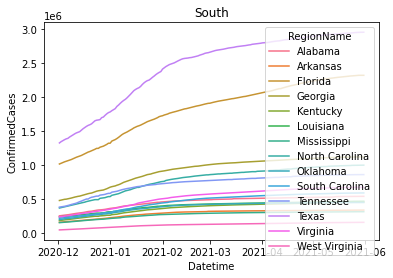

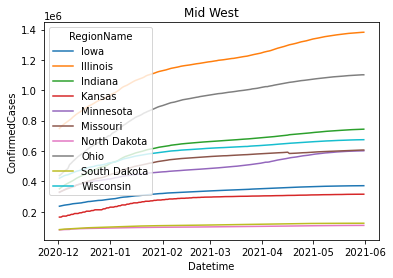

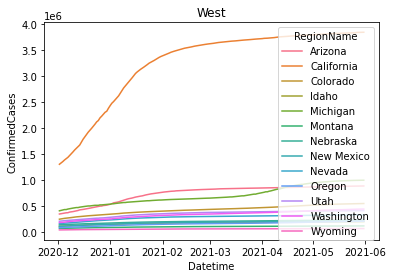

In [17]:
feature = 'ConfirmedCases'
data_onereg = data_usa_time[data_usa_time['RegionCat']=='South']
sns.lineplot(data=data_onereg, x='Datetime', y=feature, hue="RegionName")
plt.title('South')
plt.show()

data_onereg = data_usa_time[data_usa_time['RegionCat']=='Mid West']
sns.lineplot(data=data_onereg, x='Datetime', y=feature, hue="RegionName")
plt.title('Mid West')
plt.show()

data_onereg = data_usa_time[data_usa_time['RegionCat']=='West']
sns.lineplot(data=data_onereg, x='Datetime', y=feature, hue="RegionName")
plt.title('West')
plt.show()

## four aggregated policies

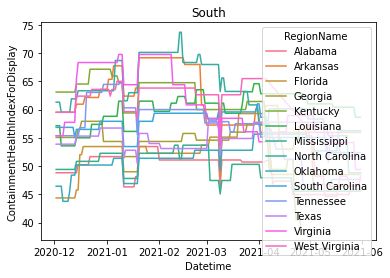

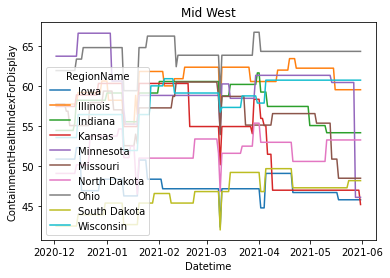

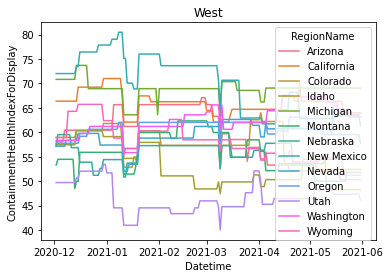

In [18]:
features = ['GovernmentResponseIndexForDisplay','ContainmentHealthIndexForDisplay',
            'StringencyIndexForDisplay', 'EconomicSupportIndexForDisplay']
feature = features[1]

data_i = data_usa_time
data_onereg = data_i[data_i['RegionCat']=='South']
sns.lineplot(data=data_onereg, x='Datetime', y=feature, hue="RegionName")
plt.title('South')
plt.show()

data_onereg = data_i[data_i['RegionCat']=='Mid West']
sns.lineplot(data=data_onereg, x='Datetime', y=feature, hue="RegionName")
plt.title('Mid West')
plt.show()

data_onereg = data_i[data_i['RegionCat']=='West']
sns.lineplot(data=data_onereg, x='Datetime', y=feature, hue="RegionName")
plt.title('West')
plt.show()

## Face covering (part of government response and contarinment&health index)

<AxesSubplot:xlabel='Datetime', ylabel='ConfirmedCases'>

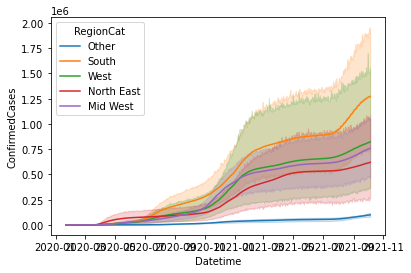

In [15]:

sns.lineplot(data=data_usa, x='Datetime', y='ConfirmedCases', hue="RegionCat")

## School closing

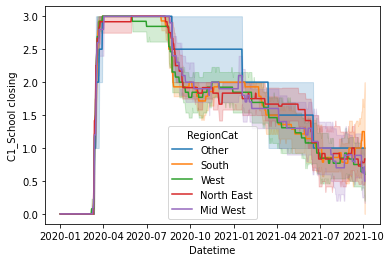

In [143]:
sns.lineplot(data=data_usa, x='Datetime', y='C1_School closing', hue="RegionCat")
plt.show()

<AxesSubplot:>

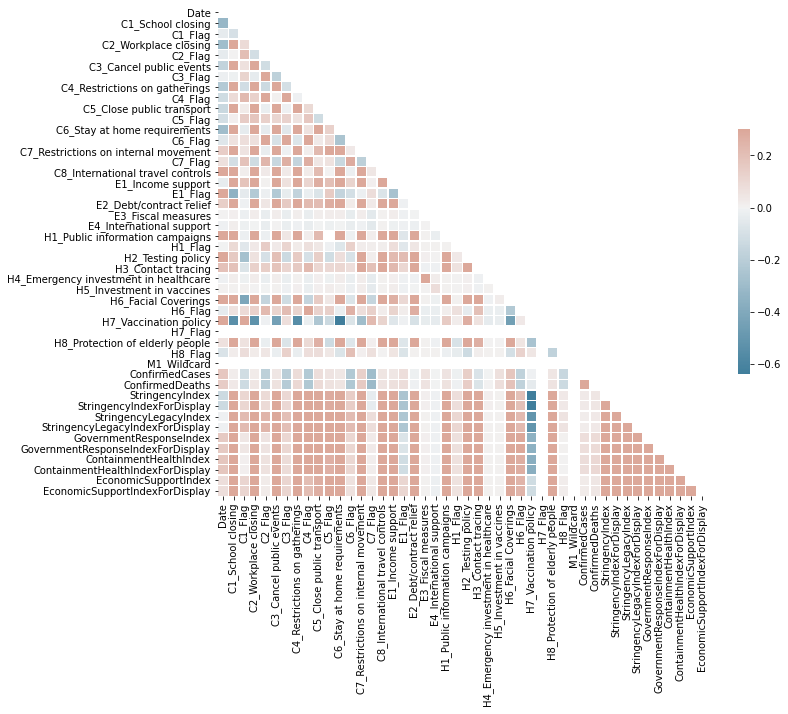

In [51]:
import numpy as np
import matplotlib.pyplot as plt

d = data_usa
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})